# Personal Movie Recommendation System_Problem 8.1_Hw8_CSE 250A_Fall 2022

In [1]:
# part a: calculating mean popularity rating

import numpy as np

# loading the hw8_ratings matrix: calling it 'rat':
rat1=np.loadtxt("hw8_ratings.txt", dtype=str, delimiter=',')
rat2=[line.replace('\t', ' ') for line in rat1]
rat3=[line.split() for line in rat2]
rat=np.array(rat3)
(studno, movieno)=np.shape(rat)  # records number of students, no. of movies
#print(rat)
movierec=np.zeros(movieno)    # vector for number of students who has recommended, for each movie 
movieseen=np.zeros(movieno)    # vector for number of students who has seen, for each movie
meanpopmov=np.zeros(movieno)    # vector for mean popularity rating, for each movie
for j in range(movieno):
    rec=0
    seen=0
    for i in range(studno):
        if rat[i,j]=='1':
            rec=rec+1
            seen=seen+1
        elif rat[i,j]=='0':
            seen=seen+1
    meanpopmov[j]=rec/seen  # stores mean popularity rating for jth movie

# loading the movie titles
mvtitles=np.loadtxt("hw8_movies.txt", dtype=str)

#printing movie titles from least popular to most popular
print(f"The movies from least to most popular are: \n")
for k in np.argsort(meanpopmov):
    print(mvtitles[k])    # prints the movie titles from least to most mean popularity


The movies from least to most popular are: 

Chappaquidick
The_Last_Airbender
I_Feel_Pretty
Fifty_Shades_of_Grey
Fast_&_Furious:_Hobbs_&_Shaw
Hustlers
Magic_Mike
Bridemaids
World_War_Z
The_Shape_of_Water
Good_Boys
Prometheus
Pokemon_Detective_Pikachu
American_Hustle
Terminator:_Dark_Fate
The_Farewell
Man_of_Steel
Fast_Five
The_Hateful_Eight
Star_Wars:_The_Force_Awakens
The_Help
Rocketman
Drive
The_Girls_with_the_Dragon_Tattoo
Thor
Avengers:_Age_of_Ultron
Phantom_Thread
Us
The_Revenant
X-Men:_First_Class
Pitch_Perfect
Dunkirk
Ready_Player_One
Room
Jurassic_World
Mad_Max:_Fury_Road
Once_Upon_a_Time_in_Hollywood
Manchester_by_the_Sea
The_Perks_of_Being_a_Wallflower
Spiderman:_Far_From_Home
Her
Captain_America:_The_First_Avenger
Frozen
Hidden_Figures
The_Hunger_Games
Iron_Man_2
Les_Miserables
Toy_Story_3
Three_Billboards_Outside_Ebbing
Darkest_Hour
Ex_Machina
Gone_Girl
Black_Swan
12_Years_a_Slave
Avengers:_Endgame
The_Avengers
Midnight_in_Paris
The_Great_Gatsby
La_La_Land
Avengers:_Infinit

For iteration 0, the log-likelihood is :-28.627324487337628 

For iteration 1, the log-likelihood is :-19.350314946503318 

For iteration 2, the log-likelihood is :-17.909564818017916 

For iteration 4, the log-likelihood is :-17.081155562337013 

For iteration 8, the log-likelihood is :-16.629824767528117 

For iteration 16, the log-likelihood is :-16.28782872191562 

For iteration 32, the log-likelihood is :-15.801537953970273 

For iteration 64, the log-likelihood is :-15.749887678844292 

For iteration 128, the log-likelihood is :-15.735940712575662 

For iteration 256, the log-likelihood is :-15.728520329683299 



Text(0.5, 1.0, 'Plot to demonstrate increment of log-likelihood with iterations')

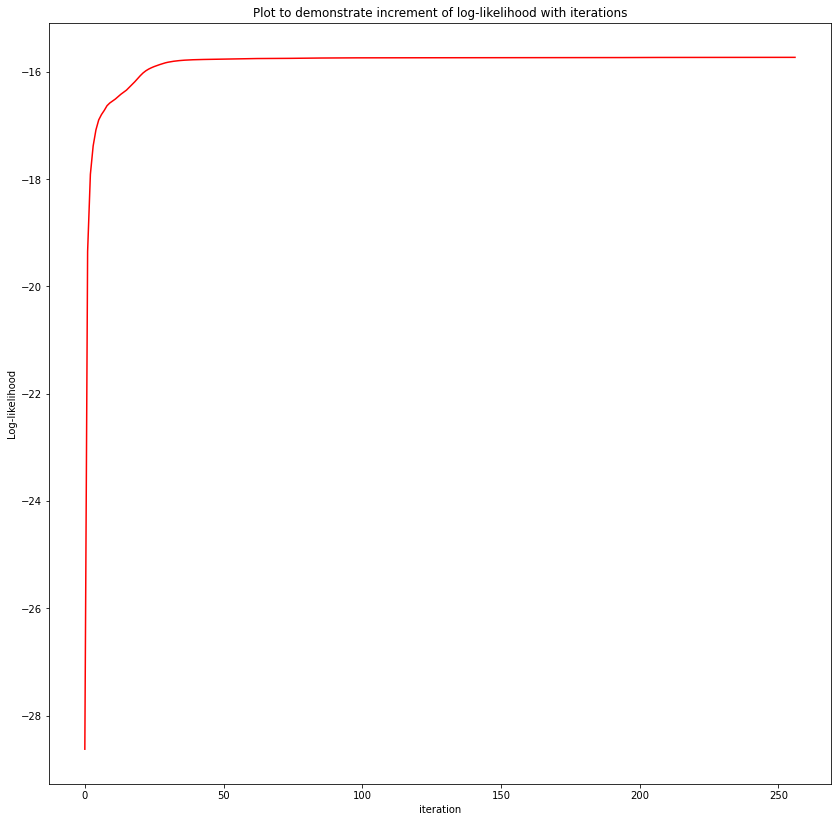

In [2]:
# part e: implementation 

import matplotlib.pyplot as plt
import copy


def floatlistconvert(strlist):    #function to convert a character list to a float list, if applicable 
    floatlist=[float(stringel) for stringel in strlist]
    return floatlist

# creating the set of movies seen (hence rated) by t th students
Omega=[ [] for _ in range(studno) ]
for t in range(studno):
    for i in range(movieno):
        if rat[t,i]=='1' or rat[t,i]=='0':
            Omega[t]=Omega[t]+[i]
            

#print(Omega)


# reading initial P(Z=i) and P(R_j=1|Z=i)
pzi=np.loadtxt("hw8_probZ_init.txt", dtype=float)  # note here first value of Z is 0 (not 1), in this notation


pr1zi_1=np.loadtxt("hw8_probR_init.txt", dtype=str, delimiter=',')
pr1zi_2=[line.replace('\t', ' ') for line in pr1zi_1]
pr1zi_3=[line.split() for line in pr1zi_2]
pr1zi=np.array([floatlistconvert(item) for item in pr1zi_3])    # it is a movieno. X k sized matrix
k=4
T=studno

def prodcondprob(t,i):
    prod=1
    for j in Omega[t]:
        if rat[t,j]=='1':
            prod=prod*pr1zi[j,i]
        elif rat[t,j]=='0':
            prod=prod*(1-pr1zi[j,i])
    return prod

def prj(t):
    s=0
    for i in range(k):
        p=pzi[i]*prodcondprob(t,i)
        s=s+p
    return s


def Estep(t):
    P=np.zeros(4)
    for i in range(k):
        P[i]=pzi[i]*prodcondprob(t,i)
    P=np.divide(P,prj(t))
    return P 

# iteration 0 
L=np.zeros(257, dtype=float)

for t in range(T):
    L[0]=np.add(L[0],np.log(prj(t)))

L[0]=L[0]/T

print(f"For iteration 0, the log-likelihood is :{L[0]} \n")

# iteration 1 to 256
for itera in range(1, 257):
    r=np.zeros((k,T))   # r is the matrix rho here
    for t in range(T):
        r[:,t]=Estep(t)
    przcopy=copy.deepcopy(pr1zi)
    for i in range(k):
        pzi[i]=np.sum(r[i,:])/T
        for j in range(movieno):
            s=0
            for t in range(T):
                if j in Omega[t]:
                    if rat[t,j]=='1':
                        s=s+r[i,t]
                else: 
                    s=s+r[i,t]*przcopy[j,i]
            pr1zi[j,i]=s/np.sum(r[i,:])
            
    for t in range(T):
        L[itera]=np.add(L[itera],np.log(prj(t)))
        
    L[itera]=L[itera]/T
    
for it in [1,2,4,8,16,32,64,128,256]:
    print(f"For iteration {it}, the log-likelihood is :{L[it]} \n")
    

# plot of log-likelihoods (with iterations) to see whether the increase or not:
itera=np.linspace(0, 256, num=257)

fig, ax = plt.subplots(figsize=(14, 14))
ax.plot(itera, L, color='r')

plt.xlabel("iteration")
plt.ylabel("Log-likelihood")
plt.title("Plot to demonstrate increment of log-likelihood with iterations")    
    

In [32]:
# part f: personal movie recommendation

import random 

def Merge(dict_1, dict_2):           # creates a dictionary by merging two dictionaries 
	result = dict_1 | dict_2
	return result


######## loading student PID data
pids=np.loadtxt("hw8_ids.txt", dtype=str)

rand=random.randint(0, studno-1)   # selects a random number between all the students

print(f"For my case (PID=A5327433), the output of the recommender system is trivial because I have watched ALL the movies in the list.")
print(f"So as instructed in Piazza, I am randomly selecting (by a random number generator) the PID {pids[rand]} from the list and recommending movies for this id.")
#myindex=np.argwhere(pids=='A14763580')[0,0]    # finds out index/row number to be found from the rating matrix using PID 
myindex=np.argwhere(pids==pids[rand])[0,0]    # finds out index/row number to be found from the rating matrix using PID
######## posterior probability of part(c)

postprob=Estep(myindex)
probdictnotseen={}
# expected ratings on movies I have not seen yet: 
for l in range(movieno):
    if l not in Omega[myindex]:
        s=0
        for i in range(k):
            s=s+postprob[i]*pr1zi[l,i]    # s is the probability 
        probdictnotseen=Merge(probdictnotseen,{l:s})
        
#print(probdictnotseen)

srteddictnotseen=dict(sorted(probdictnotseen.items(), key=lambda item: item[1]))  # sorting the last dict above by values:ascending

#print(srteddictnotseen)

print(f"\n For PID {pids[myindex]}, the list of recommended movies among the ones that the student has watched, are \n")
for l in range(movieno):
    if rat[myindex,l]=='1':
        print(mvtitles[l])

print(f"\n For PID {pids[myindex]}, the list of not-recommended movies among the ones that the student has watched, movies are \n")
for l in range(movieno):
    if rat[myindex,l]=='0':
        print(mvtitles[l])

print(f"\n For PID {pids[myindex]}, the list of unseen movies sorted by their expected ratings in ascending order\n")
for j in srteddictnotseen.keys():
    print(f"{mvtitles[j]} \t \t with probability \t \t {probdictnotseen[j]}")


For my case (PID=A5327433), the output of the recommender system is trivial because I have watched ALL the movies in the list.
So as instructed in Piazza, I am randomly selecting (by a random number generator) the PID A59019917 from the list and recommending movies for this id.

 For PID A59019917, the list of recommended movies among the ones that the student has watched, are 

The_Last_Airbender
Harry_Potter_and_the_Deathly_Hallows:_Part_1
Iron_Man_2
Toy_Story_3
Fast_Five
Thor
Captain_America:_The_First_Avenger
Harry_Potter_and_the_Deathly_Hallows:_Part_2
Prometheus
The_Avengers
The_Dark_Knight_Rises
The_Hunger_Games
Wolf_of_Wall_Street
The_Great_Gatsby
Frozen
Now_You_See_Me
World_War_Z
Interstellar
Mad_Max:_Fury_Road
Jurassic_World
Avengers:_Age_of_Ultron
Room
The_Martian
Avengers:_Infinity_War
Ready_Player_One
Avengers:_Endgame
The_Lion_King
Joker
Parasite
Pokemon_Detective_Pikachu
Terminator:_Dark_Fate

 For PID A59019917, the list of not-recommended movies among the ones that the